![](header.jpg)

# ImageIO and Making Movies

Kevin J. Walchko, Phd

8 Nov 2020

---

ImageIO uses Pillow with a simple interface to read/write images. It
is also able to work with video using `ffmpeg`.

```
pip install imageio-ffmpeg imageio
```

In [12]:
import imageio
from glob import glob
from ipywidgets import Video
from matplotlib import pyplot as plt

## Reading and Writing Images

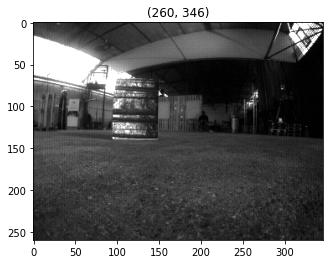

In [17]:
im = imageio.imread('dataset/image_0_685.png')

plt.imshow(im, cmap="gray")
plt.title(im.shape);

## Creating Video Files from Still Images

In [2]:
def save(imgFiles, fname, fps=30):
    writer = imageio.get_writer(fname, fps=fps)
    sz = len(imgFiles)
    for i, imgf in enumerate(imgFiles):
        im = imageio.imread(imgf)
        # writer.append_data(im[:, :, 1])
        writer.append_data(im)
        if i%100 == 0:
            print(f">> Frame {i}/{sz}")
    writer.close()

In [6]:
imgfiles = sorted(glob("./dataset/*.png"))
save(imgfiles, "test.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (346, 260) to (352, 272) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


>> Frame 0/750
>> Frame 100/750
>> Frame 200/750
>> Frame 300/750
>> Frame 400/750
>> Frame 500/750
>> Frame 600/750
>> Frame 700/750


In [8]:
Video.from_file("test.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x15\x9fqmdat\x00\x…

In [10]:
!ls -alh

total 4144
drwxr-xr-x    9 kevin  staff   288B Feb 27 14:39 .
drwxr-xr-x    7 kevin  staff   224B Feb 27 14:25 ..
-rw-r--r--@   1 kevin  staff   8.0K Feb 27 14:37 .DS_Store
drwxr-xr-x    4 kevin  staff   128B Feb 27 14:25 .ipynb_checkpoints
drwxr-xr-x  752 kevin  staff    24K Feb 27 14:37 dataset
drwxr-xr-x  192 kevin  staff   6.0K Feb 27 14:31 dataset2
-rw-r--r--    1 kevin  staff   3.8K Feb 27 14:39 imageio.ipynb
-rw-r--r--@   1 kevin  staff   641B Feb 20 12:38 imageio.md
-rw-r--r--@   1 kevin  staff   1.4M Feb 27 14:38 test.mp4
